In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.6 MB 7.4 MB/s 
     |████████████████████████████████| 2.3 MB 45.4 MB/s 
     |████████████████████████████████| 106 kB 74.3 MB/s 
     |████████████████████████████████| 278 kB 65.5 MB/s 
     |████████████████████████████████| 54 kB 3.7 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 84 kB 3.4 MB/s 
     |████████████████████████████████| 213 kB 47.1 MB/s 
     |████████████████████████████████| 55 kB 4.1 MB/s 
     |████████████████████████████████| 84 kB 4.0 MB/s 
     |████████████████████████████████| 64 kB 3.1 MB/s 
     |████████████████████████████████| 80 kB 9.6 MB/s 
     |████████████████████████████████| 68 kB 8.3 MB/s 
     |████████████████████████████████| 68 kB 8.2 MB/s 
     |████████████████████████████████| 68 kB 7.9 MB/s 
     |████████████████████████████████| 68 kB 8.4 M

In [ ]:
import gradio as gr

In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
objects =  tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = objects.load_data()

11490434/11490434 [==============================] - 1s 0us/step


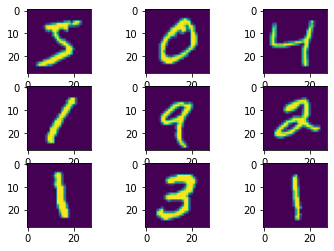

In [ ]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(training_images[i])

In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
from tensorflow.keras.layers import Flatten, Dense
model = tf.keras.models.Sequential([Flatten(input_shape=(28,28)), 
                                    Dense(256, activation='relu'),
                                    Dense(256, activation='relu'),
                                    Dense(128, activation='relu'), 
                                    Dense(10, activation=tf.nn.softmax)])

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=model.fit(training_images, training_labels, epochs=5)
history1=model.fit(test_images, test_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2062 - accuracy: 0.9371
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0915 - accuracy: 0.9714
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0641 - accuracy: 0.9794
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0495 - accuracy: 0.9843
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0382 - accuracy: 0.9876
Epoch 1/5
313/313 [==============================] - 2s 4ms/step - loss: 0.0735 - accuracy: 0.9789
Epoch 2/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0319 - accuracy: 0.9899
Epoch 3/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0223 - accuracy: 0.9942
Epoch 4/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0113 - accuracy: 0.9975
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0036 - accuracy: 0.999

In [ ]:
test=test_images[0].reshape(-1,28,28)
pred=model.predict(test)
print(pred)

1/1 [==============================] - 0s 83ms/step
[[4.6397314e-15 3.6519751e-13 1.5596643e-09 1.7575304e-11 2.7023741e-12
  5.9363023e-14 9.2540194e-18 1.0000000e+00 1.7014526e-12 1.7635632e-09]]


In [ ]:
print(history.history.keys())
print(history1.history.keys())

dict_keys(['loss', 'accuracy'])
dict_keys(['loss', 'accuracy'])


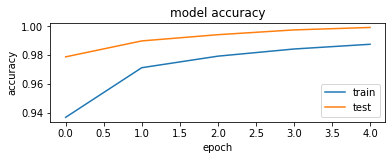

In [ ]:
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history1.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')

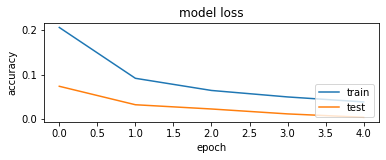

In [ ]:
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history1.history['loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')

In [ ]:
def predict_image(img):
  img_3d=img.reshape(-1,28,28)
  im_resize=img_3d/255.0
  prediction=model.predict(im_resize)
  pred=np.argmax(prediction)
  return pred


In [ ]:
y_predicted = model.predict(test_images)
y_predicted[0]


# Find the maximum value using numpy
np.argmax(y_predicted[0])

# 7
# converting y_predicted from whole numbers to integers
# so that we can use it in confusion matrix
# In short we are argmaxing the entire prediction
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

313/313 [==============================] - 1s 2ms/step


[7, 2, 1, 0, 4]

Text(69.0, 0.5, 'Truth')

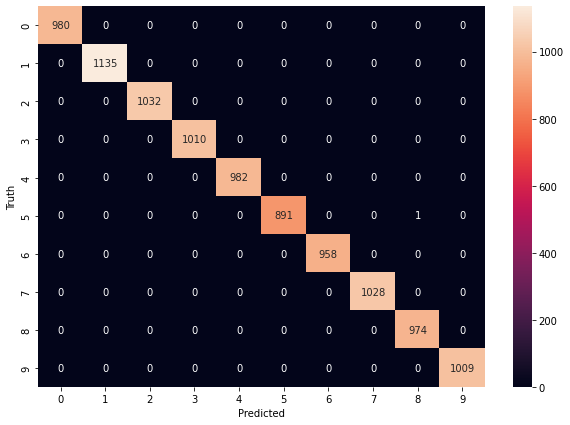

In [ ]:
cm = tf.math.confusion_matrix(labels=test_labels, predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
iface = gr.Interface(predict_image, inputs="sketchpad", outputs="label")


/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:43: UserWarning: You have unused kwarg parameters in Sketchpad, please remove them: {'visibile': True}
  warnings.warn(


In [ ]:
iface.launch(debug='True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 18ms/step
Keyboard interruption in main thread... closing server.


In [ ]:
model.save('first.h5')

NameError: ignored

In [ ]:
#from tf.keras.models import load_model
newmodel=tf.keras.models.load_model('first.h5')

In [ ]:
def predict_image(img):
  img_3d=img.reshape(-1,28,28)
  im_resize=img_3d/255.0
  prediction=newmodel.predict(im_resize)
  pred=np.argmax(prediction)
  return pred

In [ ]:
iface = gr.Interface(predict_image, inputs="sketchpad", outputs="label")

/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:43: UserWarning: You have unused kwarg parameters in Sketchpad, please remove them: {'visibile': True}
  warnings.warn(


In [ ]:
iface.launch(debug='True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 24ms/step
